In [1]:
from collections import namedtuple
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time  #helper libraries

Using TensorFlow backend.


In [21]:
Duple = namedtuple('Duple', ['x', 'y'])


class Demo(object):
    def __init__(self, fn, window_size, normalize=True):
        x_train, y_train, x_test, y_test = lstm.load_data(fn, window_size, normalize)
        self.train = Duple(x_train, y_train)
        self.test = Duple(x_test, y_test)
        self.window_size = window_size
    
    def run(self,
            layers,
            batch_size=512,
            nb_epoch=1,
            validation_split=0.05):
        model = Sequential()

        for layer in layers:
            model.add(layer)

        model.compile(loss='mse', optimizer='rmsprop')

        model.fit(self.train.x, self.train.y,
                  batch_size=batch_size, nb_epoch=nb_epoch,
                  validation_split=validation_split)

        predictions = lstm.predict_sequences_multiple(
                            model, self.test.x,
                            self.window_size, self.window_size)
        lstm.plot_results_multiple(
                            predictions, self.test.y,
                            self.window_size)        

In [22]:
demo = Demo('sp500.csv', window_size=50, normalize=True)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 1s - loss: 0.0078 - val_loss: 0.0012


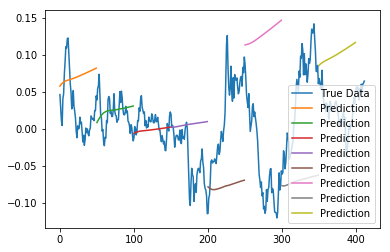

In [23]:
demo.run(layers=(LSTM(input_dim=1, output_dim=50, return_sequences=True),
                 Dropout(0.2),
                 LSTM(100, return_sequences=False),
                 Dropout(0.2),
                 Dense(output_dim=1),
                 Activation('linear')))

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 1s - loss: 0.0043 - val_loss: 7.7040e-04


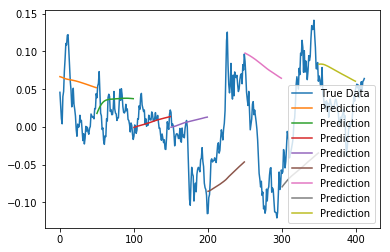

In [24]:
demo.run(layers=(LSTM(input_dim=1, output_dim=50, return_sequences=True),
                 Dropout(0.2),
                 LSTM(200, return_sequences=False),
                 Dropout(0.2),
                 Dense(output_dim=1),
                 Activation('linear')))

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 2s - loss: 0.0024 - val_loss: 8.4221e-04


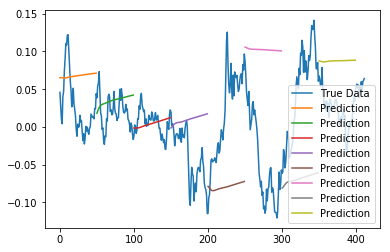

In [25]:
demo.run(layers=(LSTM(input_dim=1, output_dim=50, return_sequences=True),
                 Dropout(0.2),
                 LSTM(50, return_sequences=False),
                 Dropout(0.2),
                 Dense(output_dim=1),
                 Activation('linear')))

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 2s - loss: 0.0068 - val_loss: 8.4152e-04


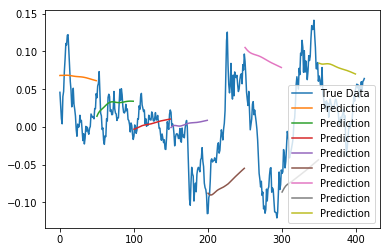

In [29]:
# add one additional LSTM layer
demo.run(layers=(LSTM(input_dim=1, output_dim=50, return_sequences=True),
                 Dropout(0.2),
                 LSTM(50, return_sequences=True),
                 Dropout(0.2),
                 LSTM(50, return_sequences=False),
                 Dropout(0.2),
                 Dense(output_dim=1),
                 Activation('linear')))

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 3s - loss: 0.0158 - val_loss: 0.0015


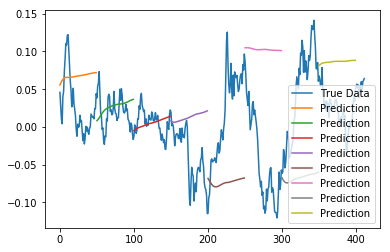

In [30]:
# add two additional LSTM layers
demo.run(layers=(LSTM(input_dim=1, output_dim=50, return_sequences=True),
                 Dropout(0.2),
                 LSTM(50, return_sequences=True),
                 Dropout(0.2),
                 LSTM(50, return_sequences=True),
                 Dropout(0.2),
                 LSTM(50, return_sequences=False),
                 Dropout(0.2),
                 Dense(output_dim=1),
                 Activation('linear')))